# ChatCalledQuest demo

The ccq module is thought as Geografia's backend engine and  is aimed to translate from written spoken-italian to written LIS-glossed texts (comprensione) and viceversa (produzione).

Sign Language don't have an exact written counterpart since its simultaneous/non-linear gesture/facial expression structure, thus the adoption of gloss-level intermediate representation of the sign message (basically a simplified version of the spoken language) .
 
 

### LIS <--> iTA Scheme : from beloved Ilenia

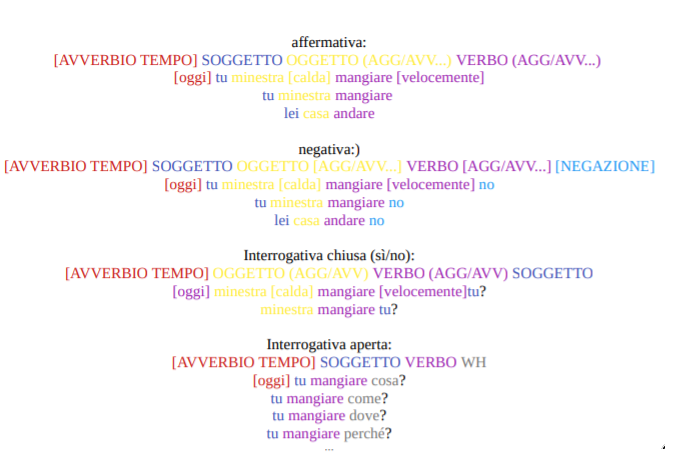

## Comprensione : gloss2spoken examples

plain string as input

In [ ]:
import os
os.environ['TOKENIZERS_PARALLELISM']='false'
import spacy
import spacy_transformers
import ccq, config
import importlib

In [ ]:
importlib.reload(ccq)
engine = ccq.CCQ()

In [ ]:
affirmative_spoken = 'Luca va in Spagna la prossima estate'
engine.translate(affirmative_spoken, direction='spoken2gloss')

In [ ]:
affirmative_spoken2 = 'Stasera voglio bere una birra'
engine.translate(affirmative_spoken2, direction='spoken2gloss')

In [ ]:
negative_spoken = 'Luca non va in Spagna la prossima estate'
engine.translate(negative_spoken, direction='spoken2gloss')

In [ ]:
closed_interrogative_spoken = 'Luca va in Spagna la prossima estate?'
engine.translate(closed_interrogative_spoken, direction='spoken2gloss')

In [ ]:
open_interrogative_spoken =  'Dove andrà Luca la prossima estate?'
engine.translate(open_interrogative_spoken, direction='spoken2gloss')

###### spoken2gloss fail test

In [ ]:
fail_spoken = open_interrogative_spoken*3
engine.translate(fail_spoken, direction='spoken2gloss')

In [ ]:
fail_spoken = 'ciao Lucia, sei strana con questa punteggiatura.'
engine.translate(fail_spoken, direction='spoken2gloss')

In [ ]:
fail_spoken = 'Luca, Antonio, Paolo e Marco vanno al mare'
engine.translate(fail_spoken, direction='spoken2gloss')

In [ ]:
fail_spoken = 'Luca, Paolo e Marco vanno al mare'
engine.translate(fail_spoken, direction='spoken2gloss')

## Produzione : gloss2spoken examples

In here it is assumed as input a list containing space/punct separated word tokens and their relative possible attribute.

The current possible (and required if the corresponding token is present) attributes are:

- subject
- verb
- time

In [ ]:
affirmative_gloss = [('prossimo','time'),('estate','time'),('luca','subject'),('spagna',''),('andare','verb')]

engine.translate(affirmative_gloss, direction='gloss2spoken')

In [ ]:
engine.translate(closed_interrogative_spoken, direction='spoken2gloss')

In [ ]:
negative_gloss = [('prossimo','time'),('estate','time'),('luca','subject'),('spagna',''),('andare','verb'),('no','')]

engine.translate(negative_gloss, direction='gloss2spoken')

In [ ]:
open_interrogative_gloss = [('prossimo','time'),('estate','time'),('luca','subject'),('andare','verb'),('dove',''),('?','')]

engine.translate(open_interrogative_gloss, direction='gloss2spoken')

In [ ]:
closed_interrogative_gloss = [('prossimo','time'),('estate','time'),('spagna',''),('andare','verb'),('luca','subject'),('?','')]

engine.translate(closed_interrogative_gloss, direction='gloss2spoken')

## zero.shot learning

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",model="Jiva/xlm-roberta-large-it-mnli",  use_fast=True, multi_label=True) 

In [ ]:
# we will classify the following wikipedia entry about Sardinia"
sequence_to_classify = "La Sardegna è una regione italiana a statuto speciale di 1 592 730 abitanti con capoluogo Cagliari, la cui denominazione bilingue utilizzata nella comunicazione ufficiale è Regione Autonoma della Sardegna / Regione Autònoma de Sardigna."
# we can specify candidate labels in Italian:
candidate_labels = ["geografia", "politica", "macchine", "cibo", "moda"]
classifier(sequence_to_classify, candidate_labels)

# todos

- extend & test failure management for gloss2spoken translation

- abbellify gloss2spoken :  add articles, conj, verb declination

- the backend will be somehow linked to somekind of db storing image having with indexes glosses; The db  will be most probably pretty limited in quantity and general in semantics terms (an image could have more than one index, and probably also an index could have more than one image) thus there will be a need for implementing also a word vector similarity engine (for synonims) and a zero-shot transformer (in order to exploit the contextual meaning of a sentence for the representantion of each word token)

- cleaner code


# useful links

- __nlp cheat sheet__

https://github.com/janlukasschroeder/nlp-cheat-sheet-python

- __spacy__
    
    https://spacy.io/models & https://spacy.io/models/it


- __transformers__ 
    - __italian zero-shot__ :  https://huggingface.co/Jiva/xlm-roberta-large-it-mnli

    - __italian fill mask__ : https://huggingface.co/Musixmatch/umberto-wikipedia-uncased-v1

- __stanford transformers--> stanza__

    https://github.com/stanfordnlp/stanza

- __transformer + spacy : italian NER__
    
    https://huggingface.co/bullmount/it_nerIta_trf

    pip install https://huggingface.co/bullmount/it_nerIta_trf/resolve/main/it_nerIta_trf-any-py3-none-any.whl
